# Your First AI application

Going forward, AI algorithms will be incorporated into more and more everyday applications. For example, you might want to include an image classifier in a smart phone app. To do this, you'd use a deep learning model trained on hundreds of thousands of images as part of the overall application architecture. A large part of software development in the future will be using these types of models as common parts of applications. 

In this project, you'll train an image classifier to recognize different species of flowers. You can imagine using something like this in a phone app that tells you the name of the flower your camera is looking at. In practice you'd train this classifier, then export it for use in your application. We'll be using [this dataset](http://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html) from Oxford of 102 flower categories, you can see a few examples below. 

<img src='assets/Flowers.png' width=500px>

The project is broken down into multiple steps:

* Load the image dataset and create a pipeline.
* Build and Train an image classifier on this dataset.
* Use your trained model to perform inference on flower images.

We'll lead you through each part which you'll implement in Python.

When you've completed this project, you'll have an application that can be trained on any set of labeled images. Here your network will be learning about flowers and end up as a command line application. But, what you do with your new skills depends on your imagination and effort in building a dataset. For example, imagine an app where you take a picture of a car, it tells you what the make and model is, then looks up information about it. Go build your own dataset and make something new.

## Import Resources

In [1]:
# TODO: Make all necessary imports.

# TensorFlow related imports
import tensorflow as tf
import tensorflow_datasets as tfds

# Other useful libraries
import numpy as np
import matplotlib.pyplot as plt
import json
from tqdm import tqdm 

2025-03-22 21:00:55.545875: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2025-03-22 21:00:55.545927: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2025-03-22 21:00:55.545978: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
/usr/local/lib/python3.11/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Load the Dataset

Here you'll use `tensorflow_datasets` to load the [Oxford Flowers 102 dataset](https://www.tensorflow.org/datasets/catalog/oxford_flowers102). This dataset has 3 splits: `'train'`, `'test'`, and `'validation'`.  You'll also need to make sure the training data is normalized and resized to 224x224 pixels as required by the pre-trained networks.

The validation and testing sets are used to measure the model's performance on data it hasn't seen yet, but you'll still need to normalize and resize the images to the appropriate size.

In [2]:
# TODO: Load the dataset with TensorFlow Datasets.

# TODO: Create a training set, a validation set and a test set.

dataset_n = "oxford_flowers102"

(raw_train, raw_validation, raw_test), dataset_info = tfds.load(
    dataset_n, 
    split = ["train", "validation", "test"],
    as_supervised= True,  
    with_info= True  
)    

Dl Completed...: 0 url [00:00, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/1 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/2 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:00<?, ? url/s]
Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...:   0%|          | 0/3 [00:01<?, ? url/s]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Completed...:  33%|███▎      | 1/3 [00:01<00:03,  1.75s/ url]
Dl Size...: 0 MiB [00:01, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Dl Size...:   0%|          | 0/328 [00:02<?, ? MiB/s]

Extraction completed...: 0 file [00:02, ? file/s]
Dl Size...:   0%|          | 1/328 [00:02<14:57,  2.74s/ MiB]

Dl Size...:   1%|          | 2/328 [00:02<14:54,  2.74s/ MiB]

Dl Size...:   1%|          | 3/328 [00:02<14:51,  2.74s/ MiB]

Dl Size...:   1%|          | 4/328 [00:02<14:48

Dl Size...:  16%|█▋        | 54/328 [00:05<00:22, 12.33 MiB/s]

Dl Size...:  17%|█▋        | 55/328 [00:05<00:22, 12.33 MiB/s]

Dl Size...:  17%|█▋        | 56/328 [00:05<00:22, 12.33 MiB/s]

Dl Size...:  17%|█▋        | 57/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  18%|█▊        | 58/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  18%|█▊        | 59/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  18%|█▊        | 60/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  19%|█▊        | 61/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  19%|█▉        | 62/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  19%|█▉        | 63/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  20%|█▉        | 64/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  20%|█▉        | 65/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  20%|██        | 66/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  20%|██        | 67/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  21%|██        | 68/328 [00:05<00:21, 12.33 MiB/s]

Dl Size...:  21%|██        | 69/328 [00:

Dl Size...:  35%|███▌      | 115/328 [00:07<00:11, 17.78 MiB/s]

Dl Size...:  35%|███▌      | 116/328 [00:07<00:11, 17.78 MiB/s]

Extraction completed...: 0 file [00:07, ? file/s]
Dl Size...:  36%|███▌      | 117/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  36%|███▌      | 118/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  36%|███▋      | 119/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  37%|███▋      | 120/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  37%|███▋      | 121/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  37%|███▋      | 122/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  38%|███▊      | 123/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  38%|███▊      | 124/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  38%|███▊      | 125/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  38%|███▊      | 126/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  39%|███▊      | 127/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  39%|███▉      | 128/328 [00:08<00:10, 19.21 MiB/s]

Dl Size...:  39%|███▉      | 129/328 [00

Dl Size...:  53%|█████▎    | 175/328 [00:10<00:07, 20.34 MiB/s]

Dl Size...:  54%|█████▎    | 176/328 [00:10<00:07, 20.34 MiB/s]

Dl Size...:  54%|█████▍    | 177/328 [00:10<00:07, 20.34 MiB/s]

Dl Size...:  54%|█████▍    | 178/328 [00:10<00:07, 20.34 MiB/s]

Dl Size...:  55%|█████▍    | 179/328 [00:10<00:07, 20.34 MiB/s]

Dl Size...:  55%|█████▍    | 180/328 [00:11<00:07, 20.34 MiB/s]

Dl Size...:  55%|█████▌    | 181/328 [00:11<00:07, 20.34 MiB/s]

Dl Size...:  55%|█████▌    | 182/328 [00:11<00:07, 20.34 MiB/s]

Dl Size...:  56%|█████▌    | 183/328 [00:11<00:07, 20.34 MiB/s]

Dl Size...:  56%|█████▌    | 184/328 [00:11<00:07, 20.34 MiB/s]

Dl Size...:  56%|█████▋    | 185/328 [00:11<00:07, 20.34 MiB/s]

Extraction completed...: 0 file [00:11, ? file/s]
Dl Size...:  57%|█████▋    | 186/328 [00:11<00:06, 20.36 MiB/s]

Dl Size...:  57%|█████▋    | 187/328 [00:11<00:06, 20.36 MiB/s]

Dl Size...:  57%|█████▋    | 188/328 [00:11<00:06, 20.36 MiB/s]

Dl Size...:  58%|█████▊    | 189/328 [00

Dl Size...:  72%|███████▏  | 235/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  72%|███████▏  | 236/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  72%|███████▏  | 237/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  73%|███████▎  | 238/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  73%|███████▎  | 239/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  73%|███████▎  | 240/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  73%|███████▎  | 241/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  74%|███████▍  | 242/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  74%|███████▍  | 243/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  74%|███████▍  | 244/328 [00:13<00:04, 20.93 MiB/s]

Dl Size...:  75%|███████▍  | 245/328 [00:13<00:03, 20.93 MiB/s]

Dl Size...:  75%|███████▌  | 246/328 [00:14<00:03, 20.93 MiB/s]

Dl Size...:  75%|███████▌  | 247/328 [00:14<00:03, 20.93 MiB/s]

Dl Size...:  76%|███████▌  | 248/328 [00:14<00:03, 20.93 MiB/s]

Dl Size...:  76%|███████▌  | 249/328 [00:14<00:03, 20.93 MiB/s]

Dl Size...:  76%|███████▌

Dl Size...:  90%|█████████ | 296/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  91%|█████████ | 297/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  91%|█████████ | 298/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  91%|█████████ | 299/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  91%|█████████▏| 300/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  92%|█████████▏| 301/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  92%|█████████▏| 302/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  92%|█████████▏| 303/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  93%|█████████▎| 304/328 [00:16<00:01, 21.80 MiB/s]

Dl Size...:  93%|█████████▎| 305/328 [00:16<00:01, 21.80 MiB/s]

Extraction completed...: 0 file [00:16, ? file/s]
Dl Size...:  93%|█████████▎| 306/328 [00:16<00:00, 22.23 MiB/s]

Dl Size...:  94%|█████████▎| 307/328 [00:16<00:00, 22.23 MiB/s]

Dl Size...:  94%|█████████▍| 308/328 [00:16<00:00, 22.23 MiB/s]

Dl Size...:  94%|█████████▍| 309/328 [00:16<00:00, 22.23 MiB/s]

Dl Size...:  95%|█████████▍| 310/328 [00

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:26<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:33<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:34<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:35<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:41<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:42<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:54<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:55<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [00:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:00<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:08<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:09<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:16<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:17<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:18<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:19<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:21<00:00, 22.23 MiB/s]



Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:25<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:27<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:28<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Extraction completed...:   0%|          | 0/8189 [01:29<?, ? file/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|███

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:29<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Extraction completed...:   2%|▏         | 154/8189 [01:30<199:51:47, 89.55s/ file]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Siz

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:30<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Extraction completed...:   4%|▍         | 308/8189 [01:31<54:04,  2.43 file/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:31<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:32<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:36<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Extraction completed...:  16%|█▌        | 1279/8189 [01:37<02:25, 47.38 file/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:37<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Extraction completed...:  18%|█▊        | 1438/8189 [01:38<01:51, 60.69 file/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:38<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Extraction completed...:  19%|█▉        | 1596/8189 [01:39<01:28, 74.82 file/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:39<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Extraction completed...:  21%|██▏       | 1754/8189 [01:40<01:12, 88.99 file/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:40<00:00, 22.23 MiB/s]

Dl Size..

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:43<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:44<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:45<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Extraction completed...:  30%|███       | 2497/8189 [01:46<00:48, 118.57 file/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:46<00:00, 22.23 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Extraction completed...:  32%|███▏      | 2623/8189 [01:47<00:48, 114.45 file/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:47<00:00, 22.23 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:48<00:00, 22.23 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [01:48<00:00,  6.32s/ url], 111.33 file/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Extraction completed...:  35%|███▌      | 2901/8189 [01:49<00:46, 113.19 file/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:49<00:00, 22.23 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Extraction completed...:  37%|███▋      | 3052/8189 [01:50<00:41, 125.01 file/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:50<00:00, 22.23 MiB/s]

Dl Size.

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:51<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:52<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:53<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:56<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:57<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:58<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [01:59<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:01<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:02<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:03<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:04<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:05<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:06<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:07<00:00, 22.23 MiB/s]


Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:10<00:00, 22.23 MiB/s]

Dl Size...: 100%|███████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:11<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:12<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:13<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:14<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:15<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:20<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Extraction completed...:  93%|█████████▎| 7641/8189 [02:21<00:03, 148.57 file/s]

Extraction completed...:  94%|█████████▍| 7693/8189 [02:21<00:03, 148.57 file/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:21<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:22<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|████████

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:23<00:00, 22.23 MiB/s]

Dl Completed...: 100%|██████████| 3/3 [02:23<00:00,  6.32s/ url], 151.56 file/s]


Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size...: 100%|██████████| 328/328 [02:24<00:00, 22.23 MiB/s]

Dl Size

Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteFZP6QG/oxford_flowers102-test.tfrecord*...:  64%|██████▍   | 3937/6149 [00:00<00:00, 6632.95 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteFZP6QG/oxford_flowers102-test.tfrecord*...:  75%|███████▍  | 4601/6149 [00:00<00:00, 6600.09 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteFZP6QG/oxford_flowers102-test.tfrecord*...:  86%|████████▌ | 5294/6149 [00:00<00:00, 6704.01 examples/s]
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteFZP6QG/oxford_flowers102-test.tfrecord*...:  97%|█████████▋| 5965/6149 [00:00<00:00, 6639.03 examples/s]
Generating validation examples...:   0%|          | 0/1020 [00:00<?, ? examples/s]
                                                                                  
Shuffling /home/student/tensorflow_datasets/oxford_flowers102/2.1.1.incompleteFZP6QG/oxford_flowers102

Dataset oxford_flowers102 downloaded and prepared to /home/student/tensorflow_datasets/oxford_flowers102/2.1.1. Subsequent calls will reuse this data.


## Explore the Dataset

In [3]:
# TODO: Get the number of examples in each set from the dataset info.
# Extract dataset split sizes
num_train = dataset_info.splits['train'].num_examples
num_validation = dataset_info.splits['validation'].num_examples
num_test = dataset_info.splits['test'].num_examples

# Display dataset sizes
print(f"Training examples   : {num_train}")
print(f"Validation examples : {num_validation}")
print(f"Test examples       : {num_test}")

# TODO: Get the number of classes in the dataset from the dataset info.
# Get number of classes from the dataset info
num_classes = dataset_info.features['label'].num_classes
print(f"Number of classes   : {num_classes}")

Training examples   : 1020
Validation examples : 1020
Test examples       : 6149
Number of classes   : 102


In [4]:
# TODO: Print the shape and corresponding label of 3 images in the training set.

# Get label names from dataset_info
get_label_name = dataset_info.features['label'].int2str

# Display shape and label name of 3 images
print("Sample images from training set:\n")
for i, (image, label) in enumerate(raw_train.take(3), 1):
    label_name = get_label_name(label)
    print(f"Image {i}:")
    print(f"  - Shape : {image.shape}")
    print(f"  - Label : {label.numpy()} ({label_name})\n")


Sample images from training set:

Image 1:
  - Shape : (500, 667, 3)
  - Label : 72 (water lily)

Image 2:
  - Shape : (500, 666, 3)
  - Label : 84 (desert-rose)

Image 3:
  - Shape : (670, 500, 3)
  - Label : 70 (gazania)



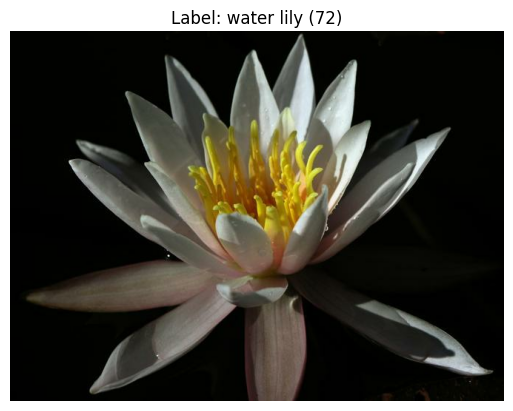

In [5]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding image label. 

# Plot a single image from the training set with its label name
import matplotlib.pyplot as plt

# Get label name converter
get_label_name = dataset_info.features['label'].int2str

# Get one sample from the training set
image, label = next(iter(raw_train))

# Plot the image
plt.imshow(image.numpy())
plt.title(f"Label: {get_label_name(label)} ({label.numpy()})")  # Show both name and numeric label
plt.axis('off')
plt.show()

### Label Mapping

You'll also need to load in a mapping from label to category name. You can find this in the file `label_map.json`. It's a JSON object which you can read in with the [`json` module](https://docs.python.org/3.7/library/json.html). This will give you a dictionary mapping the integer coded labels to the actual names of the flowers.

In [6]:
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

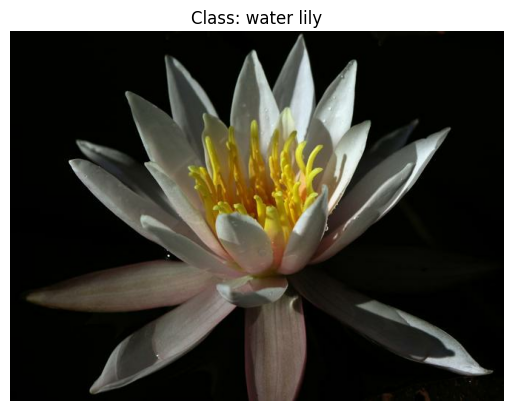

In [7]:
# TODO: Plot 1 image from the training set. Set the title 
# of the plot to the corresponding class name. 

# Get image and label
image, label = next(iter(raw_train))
label_index = label.numpy()

# Plot the image
plt.imshow(image.numpy())
plt.title(f"Class: {class_names[str(label_index)]}")  # Use class name from the dictionary
plt.axis('off')
plt.show()

## Create Pipeline

In [8]:
# TODO: Create a pipeline for each set.

# Preprocessing function: Resize and normalize images, one-hot encode labels
def preprocess_image(image, label):
    image = tf.image.resize(image, (224, 224))  # Resize to 224x224
    image = image / 255.0                       # Normalize pixel values to [0, 1]
    label = tf.one_hot(label, depth=102)        # One-hot encode the label (assuming 102 classes)
    return image, label

# Create tf.data pipelines
train_data = raw_train.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
validation_data = raw_validation.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = raw_test.map(preprocess_image).batch(32).prefetch(tf.data.AUTOTUNE)

# Preview shape of a batch from each dataset
print("\nTraining Data Batch:")
for images, labels in train_data.take(1):
    print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

print("\nValidation Data Batch:")
for images, labels in validation_data.take(1):
    print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")

print("\nTest Data Batch:")
for images, labels in test_data.take(1):
    print(f"Images shape: {images.shape}, Labels shape: {labels.shape}")


Training Data Batch:
Images shape: (32, 224, 224, 3), Labels shape: (32, 102)

Validation Data Batch:
Images shape: (32, 224, 224, 3), Labels shape: (32, 102)

Test Data Batch:
Images shape: (32, 224, 224, 3), Labels shape: (32, 102)


# Build and Train the Classifier

Now that the data is ready, it's time to build and train the classifier. You should use the MobileNet pre-trained model from TensorFlow Hub to get the image features. Build and train a new feed-forward classifier using those features.

We're going to leave this part up to you. If you want to talk through it with someone, chat with your fellow students! 

Refer to the rubric for guidance on successfully completing this section. Things you'll need to do:

* Load the MobileNet pre-trained network from TensorFlow Hub.
* Define a new, untrained feed-forward network as a classifier.
* Train the classifier.
* Plot the loss and accuracy values achieved during training for the training and validation set.
* Save your trained model as a Keras model. 

We've left a cell open for you below, but use as many as you need. Our advice is to break the problem up into smaller parts you can run separately. Check that each part is doing what you expect, then move on to the next. You'll likely find that as you work through each part, you'll need to go back and modify your previous code. This is totally normal!

When training make sure you're updating only the weights of the feed-forward network. You should be able to get the validation accuracy above 70% if you build everything right.

**Note for Workspace users:** One important tip if you're using the workspace to run your code: To avoid having your workspace disconnect during the long-running tasks in this notebook, please read in the earlier page in this lesson called Intro to GPU Workspaces about Keeping Your Session Active. You'll want to include code from the workspace_utils.py module. Also, If your model is over 1 GB when saved as a checkpoint, there might be issues with saving backups in your workspace. If your saved checkpoint is larger than 1 GB (you can open a terminal and check with `ls -lh`), you should reduce the size of your hidden layers and train again.

In [9]:
# TODO: Build and train your network.

import tensorflow as tf
import tensorflow_hub as hub
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from PIL import Image

# Load MobileNetV2 feature extractor from TensorFlow Hub (no training on it)
feature_extractor = hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4", 
    input_shape=(224, 224, 3), 
    trainable=False
)

# Build the classification model
model = models.Sequential([
    feature_extractor,
    layers.Dense(256, activation='relu'),       # hidden dense layer (can be adjusted)
    layers.Dropout(0.3),                        # optional dropout for regularization
    layers.Dense(102, activation='softmax')     # output layer for 102 classes
])

# Compile the model
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

# Print model summary
model.summary()

# Train the model
history = model.fit(
    train_data,
    validation_data=validation_data,
    epochs=10
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer (KerasLayer)    (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 256)               327936    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 102)               26214     
                                                                 
Total params: 2612134 (9.96 MB)
Trainable params: 354150 (1.35 MB)
Non-trainable params: 2257984 (8.61 MB)
_________________________________________________________________
Epoch 1/10
32/32 [==============================] - 21s 282ms/step - loss: 4.4539 - accuracy: 0.0608 - val_loss: 3.6331 - val_accuracy: 0.2686
Epoc

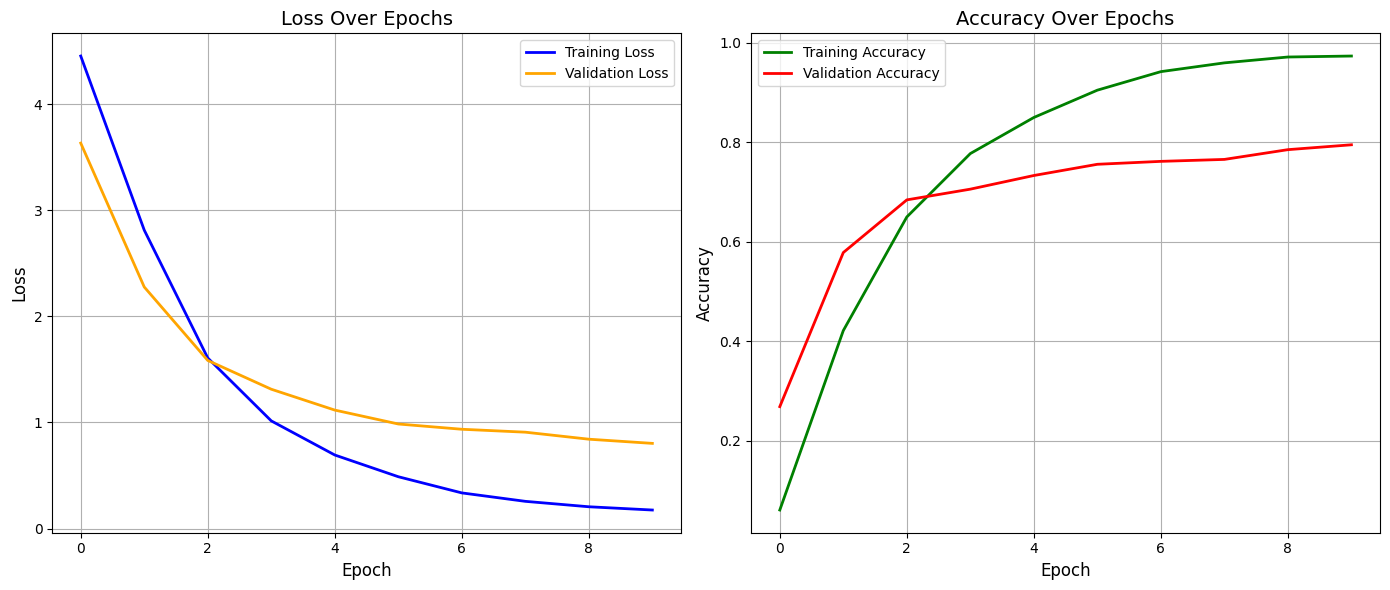

In [10]:
# TODO: Plot the loss and accuracy values achieved during training for the training and validation set.

# Plot training & validation loss and accuracy over epochs
plt.figure(figsize=(14, 6))

# Loss
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss', color='blue', linewidth=2)
plt.plot(history.history['val_loss'], label='Validation Loss', color='orange', linewidth=2)
plt.title('Loss Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Loss', fontsize=12)
plt.legend()
plt.grid(True)

# Accuracy
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy', color='green', linewidth=2)
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', color='red', linewidth=2)
plt.title('Accuracy Over Epochs', fontsize=14)
plt.xlabel('Epoch', fontsize=12)
plt.ylabel('Accuracy', fontsize=12)
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


## Testing your Network

It's good practice to test your trained network on test data, images the network has never seen either in training or validation. This will give you a good estimate for the model's performance on completely new images. You should be able to reach around 70% accuracy on the test set if the model has been trained well.

In [11]:
# TODO: Print the loss and accuracy values achieved on the entire test set.

# Evaluate the model on the test set and print the results
test_loss, test_accuracy = model.evaluate(test_data)

# Print the loss and accuracy on the test set
print(f"Test Results: \nLoss: {test_loss:.4f}, Accuracy: {test_accuracy*100:.2f}%")

193/193 [==============================] - 23s 117ms/step - loss: 0.9472 - accuracy: 0.7668
Test Results: 
Loss: 0.9472, Accuracy: 76.68%


## Save the Model

Now that your network is trained, save the model so you can load it later for making inference. In the cell below save your model as a Keras model (*i.e.* save it as an HDF5 file).

In [12]:
# TODO: Save your trained model as a Keras model.
model.save('flower_classifier_model.keras')

## Load the Keras Model

Load the Keras model you saved above.

In [13]:
# TODO: Load the Keras model
loaded_model = tf.keras.models.load_model('flower_classifier_model.keras', custom_objects={'KerasLayer': hub.KerasLayer})

# Inference for Classification

Now you'll write a function that uses your trained network for inference. Write a function called `predict` that takes an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

The `predict` function will also need to handle pre-processing the input image such that it can be used by your model. We recommend you write a separate function called `process_image` that performs the pre-processing. You can then call the `process_image` function from the `predict` function. 

### Image Pre-processing

The `process_image` function should take in an image (in the form of a NumPy array) and return an image in the form of a NumPy array with shape `(224, 224, 3)`.

First, you should convert your image into a TensorFlow Tensor and then resize it to the appropriate size using `tf.image.resize`.

Second, the pixel values of the input images are typically encoded as integers in the range 0-255, but the model expects the pixel values to be floats in the range 0-1. Therefore, you'll also need to normalize the pixel values. 

Finally, convert your image back to a NumPy array using the `.numpy()` method.

In [14]:
# TODO: Create the process_image function

def process_image(image):
    image = tf.convert_to_tensor(image, dtype=tf.float32)
    
    # Resize the image to 224x224
    image = tf.image.resize(image, (224, 224))
    
    # Normalize the image values to range [0, 1]
    image /= 255.0
    
    return image  # Return as a tf.Tensor

To check your `process_image` function we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

The code below loads one of the above images using `PIL` and plots the original image alongside the image produced by your `process_image` function. If your `process_image` function works, the plotted image should be the correct size. 

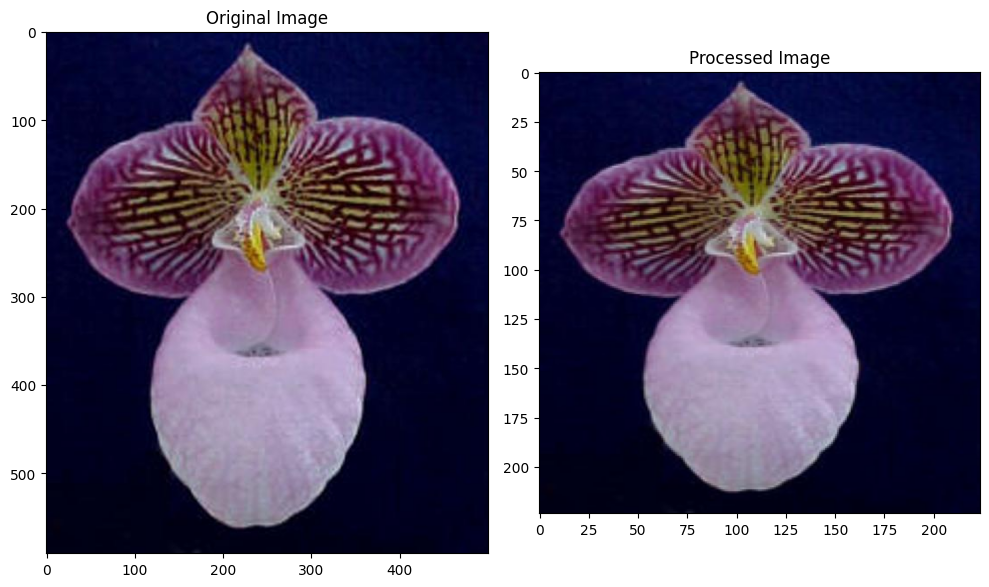

In [15]:
from PIL import Image

image_path = './test_images/hard-leaved_pocket_orchid.jpg'
im = Image.open(image_path)
test_image = np.asarray(im)

processed_test_image = process_image(test_image)

fig, (ax1, ax2) = plt.subplots(figsize=(10,10), ncols=2)
ax1.imshow(test_image)
ax1.set_title('Original Image')
ax2.imshow(processed_test_image)
ax2.set_title('Processed Image')
plt.tight_layout()
plt.show()

Once you can get images in the correct format, it's time to write the `predict` function for making inference with your model.

### Inference

Remember, the `predict` function should take an image, a model, and then returns the top $K$ most likely class labels along with the probabilities. The function call should look like: 

```python
probs, classes = predict(image_path, model, top_k)
```

If `top_k=5` the output of the `predict` function should be something like this:

```python
probs, classes = predict(image_path, model, 5)
print(probs)
print(classes)
> [ 0.01558163  0.01541934  0.01452626  0.01443549  0.01407339]
> ['70', '3', '45', '62', '55']
```

Your `predict` function should use `PIL` to load the image from the given `image_path`. You can use the [Image.open](https://pillow.readthedocs.io/en/latest/reference/Image.html#PIL.Image.open) function to load the images. The `Image.open()` function returns an `Image` object. You can convert this `Image` object to a NumPy array by using the `np.asarray()` function.

**Note:** The image returned by the `process_image` function is a NumPy array with shape `(224, 224, 3)` but the model expects the input images to be of shape `(1, 224, 224, 3)`. This extra dimension represents the batch size. We suggest you use the `np.expand_dims()` function to add the extra dimension. 

In [16]:
# TODO: Create the predict function

# Function to predict top-k classes for a given image
def predict(image_path, model, top_k=5):
    # Open image and convert to numpy array
    image = Image.open(image_path)
    image = np.asarray(image)
    
    # Process image
    image = process_image(image)
    
    # Add batch dimension (model expects a batch of images)
    image = np.expand_dims(image, axis=0)
    
    # Make prediction
    preds = model.predict(image)
    
    # Get top-k predictions and corresponding classes
    top_probs, top_classes = tf.math.top_k(preds, k=top_k)
    
    # Return results as flattened numpy arrays
    return top_probs.numpy().flatten(), top_classes.numpy().flatten()

# Test the function with an image
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
probs, classes = predict(image_path, loaded_model, top_k=5)

print("Top-5 Probabilities:", probs)
print("Top-5 Classes:", classes)

1/1 [==============================] - 1s 923ms/step
Top-5 Probabilities: [9.9720806e-01 6.2872161e-04 4.8676896e-04 2.1547066e-04 1.7326885e-04]
Top-5 Classes: [ 1  5  6 19  0]


# Sanity Check

It's always good to check the predictions made by your model to make sure they are correct. To check your predictions we have provided 4 images in the `./test_images/` folder:

* cautleya_spicata.jpg
* hard-leaved_pocket_orchid.jpg
* orange_dahlia.jpg
* wild_pansy.jpg

In the cell below use `matplotlib` to plot the input image alongside the probabilities for the top 5 classes predicted by your model. Plot the probabilities as a bar graph. The plot should look like this:

<img src='assets/inference_example.png' width=600px>

You can convert from the class integer labels to actual flower names using `class_names`. 

1/1 [==============================] - 0s 30ms/step


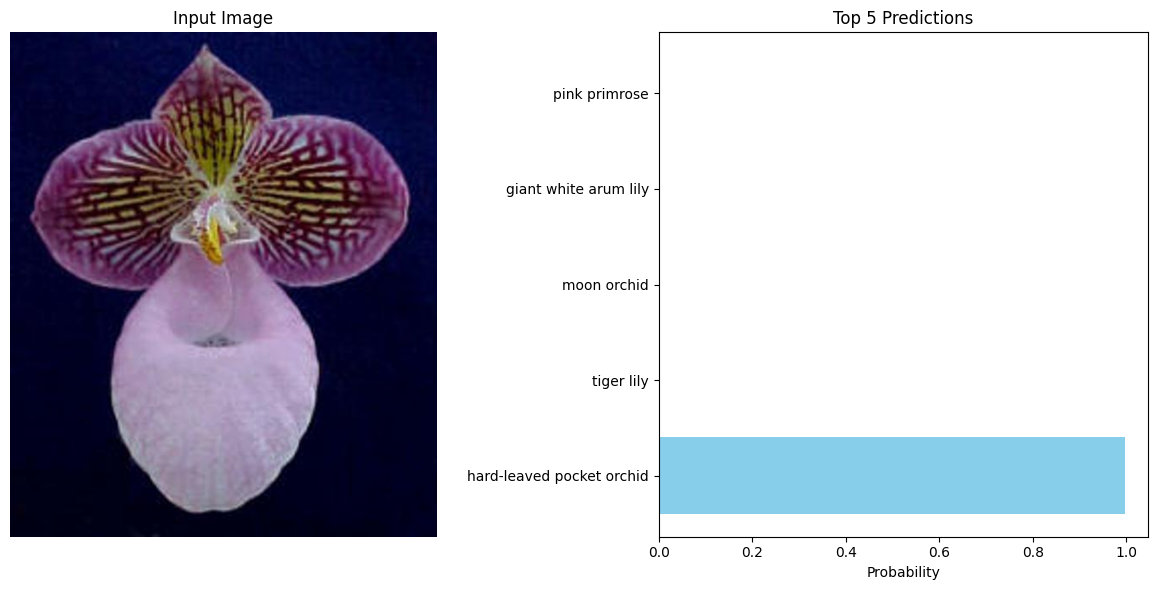

In [20]:
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the label mapping
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Function to plot the input image along with the top 5 classes
def plot_predictions(image_path, model, top_k=5):
    # Get predictions
    probs, classes = predict(image_path, model, top_k)
    
    # Map class indices to flower names
    flower_names = [class_names[str(cls)] for cls in classes]
    
    # Display the image and predictions in subplots
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2)

    # Open image and display on ax1
    image = Image.open(image_path)
    ax1.imshow(image)
    ax1.set_title("Input Image")
    ax1.axis('off')  # Hide axis for better image display

    # Plot the top 5 predictions as a horizontal bar chart on ax2
    ax2.barh(range(top_k), probs, color='skyblue')
    ax2.set_yticks(range(top_k))
    ax2.set_yticklabels(flower_names)
    ax2.set_xlabel('Probability')
    ax2.set_title("Top 5 Predictions")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Test the function with an image
image_path = './test_images/hard-leaved_pocket_orchid.jpg'
plot_predictions(image_path, loaded_model, top_k=5)

1/1 [==============================] - 0s 30ms/step


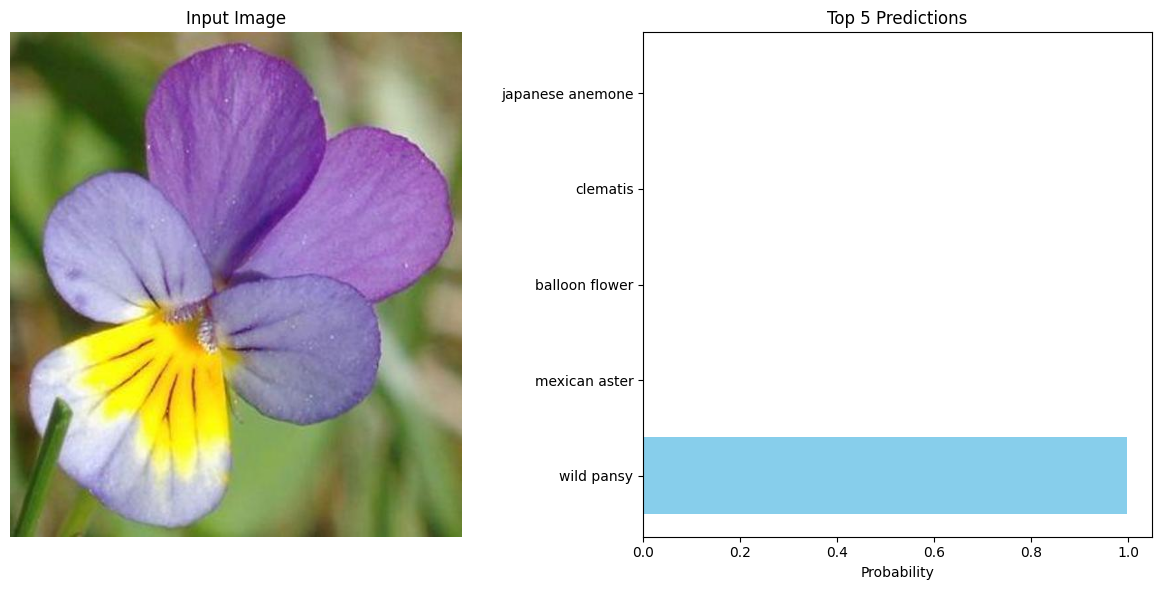

In [21]:
import json
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Load the label mapping
with open('label_map.json', 'r') as f:
    class_names = json.load(f)

# Function to plot the input image along with the top 5 classes
def plot_predictions(image_path, model, top_k=5):
    # Get predictions
    probs, classes = predict(image_path, model, top_k)
    
    # Map class indices to flower names
    flower_names = [class_names[str(cls)] for cls in classes]
    
    # Display the image and predictions in subplots
    fig, (ax1, ax2) = plt.subplots(figsize=(12, 6), ncols=2)

    # Open image and display on ax1
    image = Image.open(image_path)
    ax1.imshow(image)
    ax1.set_title("Input Image")
    ax1.axis('off')  # Hide axis for better image display

    # Plot the top 5 predictions as a horizontal bar chart on ax2
    ax2.barh(range(top_k), probs, color='skyblue')
    ax2.set_yticks(range(top_k))
    ax2.set_yticklabels(flower_names)
    ax2.set_xlabel('Probability')
    ax2.set_title("Top 5 Predictions")

    # Show the plot
    plt.tight_layout()
    plt.show()

# Test the function with an image
image_path = './test_images/wild_pansy.jpg'
plot_predictions(image_path, loaded_model, top_k=5)